## Proyecto 02 - Arboles de decision

In [3]:
import pandas as pd
import numpy as np
from  skimage.io import imread, imshow
import pywt
import pywt.data

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 2)

### Lectura de datos

In [4]:
path = "data/Dataset/sign_mnist_train.csv" #"C:/Users/GNC/Desktop/sign_mnist_train/train2.csv"
data= pd.read_csv(path)

x = data.loc[:, data.columns != "label"].values
y = data.loc[:,"label"].values.reshape(-1,1)

In [5]:
print(x.shape, y.shape)

(27455, 784) (27455, 1)


In [16]:
pathTest = "data/Dataset/sign_mnist_test.csv" #"C:/Users/GNC/Desktop/sign_mnist_train/test2.csv" 
datatest = pd.read_csv(pathTest)

xtest = datatest.loc[:,data.columns != "label"].values
ytest = datatest.loc[:,"label"].values.reshape(-1,1)

In [399]:
print(xtest.shape, ytest.shape)

(7172, 784) (7172, 1)


In [233]:
datatest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### Entrenando al clasificador - No preprocessing

In [404]:
tree_clf = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 2, min_samples_split = 3, 
                                  random_state = 1)
clf  = tree_clf.fit(x, y)

correctos = []
incorrectos = []
y_pred = clf.predict(xtest)

for index in range(datatest.shape[0]):
    if ytest[index] == y_pred[index]:
        correctos.append(index)
    else:
        incorrectos.append(index)
print("Accuracy: ", 100*len(correctos)/xtest.shape[0])   #Accuracy:  48.54991634132738  - 45.60791968767429

Accuracy:  48.54991634132738


In [408]:
confusion = confusion_matrix(y_pred, ytest)
dfconfusion = pd.DataFrame(confusion)
dfconfusion.columns = np.unique(y_pred)
dfconfusion.index = np.unique(y_pred)
dfconfusion.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,295,0,0,5,22,0,0,0,9,0,0,5,32,2,0,0,0,2,0,2,2,0,0,0
1,2,295,0,15,8,3,1,1,16,12,7,5,16,0,17,0,8,5,0,15,4,4,1,4
2,0,5,275,0,1,7,4,0,1,0,21,5,0,23,0,0,0,0,19,0,0,0,5,0
3,0,12,0,91,17,2,8,8,9,21,0,3,6,0,1,1,0,4,2,17,6,15,16,12
4,1,1,0,1,305,0,0,0,1,4,2,29,1,4,0,0,1,15,0,0,0,0,0,3


In [409]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       331
           1       0.67      0.68      0.68       432
           2       0.75      0.89      0.81       310
           3       0.36      0.37      0.37       245
           4       0.83      0.61      0.70       498
           5       0.52      0.58      0.55       247
           6       0.47      0.53      0.50       348
           7       0.66      0.69      0.67       436
           8       0.34      0.31      0.32       288
          10       0.40      0.25      0.31       331
          11       0.34      0.50      0.41       209
          12       0.27      0.22      0.24       394
          13       0.30      0.25      0.28       291
          14       0.51      0.40      0.45       246
          15       0.68      0.63      0.65       347
          16       0.49      0.59      0.53       164
          17       0.10      0.25      0.14       144
          18       0.22    

### Entrenado al clasificador - aplicando PCA

In [410]:
scaling=StandardScaler()

In [411]:
scaling.fit(x)

xscaled=scaling.transform(x)
xscaledtest=scaling.transform(xtest)

In [412]:
# Calculamos el máximo número de componentes (Nro variables = Nro máximo de componentes)
pca = PCA()
pca.fit(xscaled)
pca.explained_variance_ratio_

array([3.57283838e-01, 8.34841665e-02, 6.97583623e-02, 4.89473378e-02,
       3.67804886e-02, 2.65606877e-02, 2.55044629e-02, 2.03395824e-02,
       1.81803075e-02, 1.61187791e-02, 1.37140659e-02, 1.30344009e-02,
       1.12142543e-02, 1.01498381e-02, 9.00390109e-03, 8.17253073e-03,
       7.51541236e-03, 7.13299130e-03, 6.80402415e-03, 5.98119768e-03,
       5.58618702e-03, 5.07843926e-03, 4.89825957e-03, 4.73179722e-03,
       4.33886886e-03, 4.03223261e-03, 3.90426541e-03, 3.62658157e-03,
       3.43464158e-03, 3.40138062e-03, 3.22659913e-03, 3.16167149e-03,
       3.07417263e-03, 2.94595447e-03, 2.84344338e-03, 2.78839149e-03,
       2.63233451e-03, 2.60360053e-03, 2.50724731e-03, 2.46637901e-03,
       2.37768873e-03, 2.23006260e-03, 2.17904627e-03, 2.09221854e-03,
       2.06752197e-03, 2.03143473e-03, 1.95426305e-03, 1.89918958e-03,
       1.82576106e-03, 1.77822368e-03, 1.74693104e-03, 1.72018693e-03,
       1.68009289e-03, 1.59712275e-03, 1.55204196e-03, 1.52402214e-03,
      

% Var. explicada (1 componentes):  35.72838378518777
% Var. explicada (2 componentes):  44.07680043275255
% Var. explicada (3 componentes):  51.05263666054849
% Var. explicada (4 componentes):  55.947370436340414
% Var. explicada (5 componentes):  59.62541929995514
% Var. explicada (6 componentes):  62.28148806757689
% Var. explicada (7 componentes):  64.83193435336227
% Var. explicada (8 componentes):  66.86589259797621
% Var. explicada (9 componentes):  68.68392334339521
% Var. explicada (10 componentes):  70.29580125020668
% Var. explicada (11 componentes):  71.6672078357121
% Var. explicada (12 componentes):  72.97064792109563
% Var. explicada (13 componentes):  74.09207334927183
% Var. explicada (14 componentes):  75.10705715995182
% Var. explicada (15 componentes):  76.007447268905
% Var. explicada (16 componentes):  76.82470034184537
% Var. explicada (17 componentes):  77.57624157815903
% Var. explicada (18 componentes):  78.28954070852735
% Var. explicada (19 componentes):  78.

% Var. explicada (464 componentes):  99.79772386565003
% Var. explicada (465 componentes):  99.79971826480931
% Var. explicada (466 componentes):  99.8016869122573
% Var. explicada (467 componentes):  99.80364535690852
% Var. explicada (468 componentes):  99.80559839489922
% Var. explicada (469 componentes):  99.80753411832237
% Var. explicada (470 componentes):  99.80945235080266
% Var. explicada (471 componentes):  99.81136126249133
% Var. explicada (472 componentes):  99.81325477298547
% Var. explicada (473 componentes):  99.81510827525946
% Var. explicada (474 componentes):  99.8169549139435
% Var. explicada (475 componentes):  99.81877740108396
% Var. explicada (476 componentes):  99.82059472064891
% Var. explicada (477 componentes):  99.82237312315587
% Var. explicada (478 componentes):  99.82414324578968
% Var. explicada (479 componentes):  99.82590684324192
% Var. explicada (480 componentes):  99.82765016264791
% Var. explicada (481 componentes):  99.82939040783637
% Var. expli

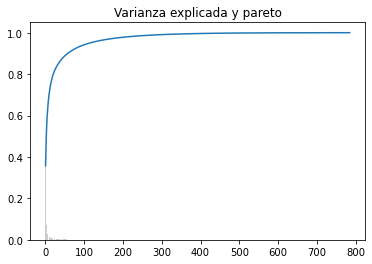

In [413]:
for i in range(len(pca.components_)):
    print('% Var. explicada ('+str(i+1)+' componentes): ', np.cumsum(pca.explained_variance_ratio_)[i]*100)
    
plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_, alpha=.2,color='0')
plt.plot(range(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_),alpha=4)
plt.title("Varianza explicada y pareto")
plt.show()

In [414]:
# Elegimos la componente adecuada: del grafico se observa que a partir de 40 componentes ya se explica el 86% de la data
cantidadComp = 50  # 70 ideal

colNames = []
for i in range(1,cantidadComp + 1):
  colNames.append("col_"+str(i))

pcaFin = PCA(n_components=cantidadComp)
pcaFin.fit(xscaled)

pd.DataFrame(pcaFin.components_).head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,-4.76e-02,-0.05,-0.05,-0.05,-5.21e-02,-5.29e-02,-5.34e-02,-5.39e-02,-5.40e-02,-5.41e-02,-0.05,-5.36e-02,-5.29e-02,-5.24e-02,-5.17e-02,-0.05,-0.05,-0.05,-0.05,-4.71e-02,-4.45e-02,-4.11e-02,-3.73e-02,-3.41e-02,-3.19e-02,-2.83e-02,-2.55e-02,-2.42e-02,-4.77e-02,-4.91e-02,-0.05,-0.05,-5.22e-02,-5.30e-02,-5.35e-02,-5.40e-02,-5.40e-02,-5.37e-02,-5.36e-02,-5.29e-02,...,-1.82e-02,-1.76e-02,-0.02,-1.89e-02,-1.99e-02,-2.13e-02,-2.14e-02,-0.02,-0.02,-2.08e-02,-1.95e-02,-1.82e-02,-0.03,-0.03,-0.03,-0.03,-2.54e-02,-2.39e-02,-0.02,-0.02,-0.02,-0.02,-1.88e-02,-0.02,-0.02,-1.73e-02,-0.02,-0.02,-1.72e-02,-0.02,-0.02,-1.79e-02,-1.94e-02,-2.00e-02,-1.97e-02,-1.99e-02,-1.95e-02,-1.85e-02,-1.71e-02,-1.61e-02
1,5.46e-02,0.05,0.05,0.05,4.34e-02,3.90e-02,3.43e-02,2.87e-02,2.34e-02,1.88e-02,0.01,7.36e-03,1.09e-03,-2.73e-03,-7.05e-03,-0.01,-0.01,-0.02,-0.02,-2.34e-02,-2.68e-02,-2.95e-02,-3.19e-02,-3.61e-02,-4.08e-02,-4.57e-02,-4.85e-02,-4.83e-02,5.50e-02,5.28e-02,0.05,0.05,4.32e-02,3.90e-02,3.41e-02,2.86e-02,2.31e-02,1.82e-02,1.16e-02,6.06e-03,...,-4.17e-03,9.62e-03,0.02,2.44e-02,2.71e-02,2.83e-02,2.36e-02,0.02,0.02,1.52e-02,1.22e-02,8.86e-03,0.03,0.02,0.02,0.01,7.89e-03,-1.59e-03,-0.01,-0.02,-0.03,-0.04,-5.07e-02,-0.05,-0.05,-3.28e-02,-0.02,-0.01,4.28e-03,0.01,0.02,2.64e-02,2.75e-02,2.63e-02,2.17e-02,1.80e-02,1.57e-02,1.26e-02,8.63e-03,6.14e-03
2,1.49e-02,0.02,0.02,0.02,2.10e-02,2.25e-02,2.30e-02,2.29e-02,2.21e-02,2.25e-02,0.02,1.97e-02,1.70e-02,1.63e-02,1.61e-02,0.02,0.01,0.01,0.01,8.46e-03,6.76e-03,4.81e-03,3.07e-03,2.25e-03,2.42e-03,-1.99e-03,-4.89e-03,-2.68e-03,1.51e-02,1.55e-02,0.02,0.02,2.17e-02,2.34e-02,2.35e-02,2.37e-02,2.26e-02,2.35e-02,2.27e-02,1.97e-02,...,-4.98e-02,-5.82e-02,-0.07,-7.73e-02,-8.45e-02,-8.93e-02,-9.41e-02,-0.09,-0.09,-9.36e-02,-9.27e-02,-9.10e-02,-0.02,-0.02,-0.02,-0.02,-1.69e-02,-1.54e-02,-0.01,-0.02,-0.01,-0.01,-1.58e-02,-0.02,-0.03,-3.85e-02,-0.04,-0.05,-5.32e-02,-0.06,-0.07,-7.88e-02,-8.45e-02,-8.69e-02,-9.07e-02,-9.24e-02,-9.01e-02,-8.94e-02,-8.84e-02,-8.58e-02
3,9.34e-03,0.01,0.01,0.01,1.45e-02,1.65e-02,1.96e-02,2.30e-02,2.65e-02,2.99e-02,0.03,3.58e-02,4.09e-02,4.57e-02,4.88e-02,0.05,0.05,0.06,0.06,6.24e-02,6.37e-02,6.62e-02,6.72e-02,6.56e-02,6.52e-02,6.36e-02,6.24e-02,6.30e-02,8.63e-03,9.94e-03,0.01,0.01,1.38e-02,1.58e-02,1.87e-02,2.20e-02,2.58e-02,2.80e-02,3.17e-02,3.35e-02,...,2.72e-02,2.87e-02,0.02,7.32e-03,4.03e-04,-4.13e-03,-8.75e-03,-0.01,-0.01,-9.54e-03,-6.92e-03,-4.86e-03,-0.06,-0.06,-0.06,-0.06,-6.15e-02,-6.36e-02,-0.06,-0.06,-0.06,-0.06,-5.54e-02,-0.04,-0.03,-8.24e-04,0.01,0.02,2.84e-02,0.03,0.02,5.40e-03,4.55e-04,-3.36e-03,-6.55e-03,-8.86e-03,-9.03e-03,-7.64e-03,-5.42e-03,-4.03e-03
4,1.51e-02,0.01,0.01,0.01,7.50e-03,4.13e-03,6.68e-04,-1.87e-03,-4.55e-03,-6.69e-03,-0.01,-1.31e-02,-1.75e-02,-2.00e-02,-2.34e-02,-0.03,-0.03,-0.03,-0.03,-3.80e-02,-4.76e-02,-5.78e-02,-7.03e-02,-7.95e-02,-8.61e-02,-8.98e-02,-8.55e-02,-7.42e-02,1.57e-02,1.51e-02,0.01,0.01,7.63e-03,4.65e-03,1.68e-03,-1.03e-03,-4.29e-03,-6.80e-03,-9.87e-03,-1.25e-02,...,5.96e-02,5.01e-02,0.04,2.05e-02,1.42e-03,-9.69e-03,-1.38e-02,-0.02,-0.02,-2.28e-02,-2.63e-02,-2.57e-02,-0.04,-0.04,-0.04,-0.05,-5.00e-02,-5.15e-02,-0.05,-0.04,-0.02,-0.01,5.56e-03,0.02,0.03,4.75e-02,0.06,0.06,5.29e-02,0.04,0.03,1.09e-02,-4.93e-03,-1.39e-02,-1.61e-02,-1.78e-02,-1.92e-02,-2.35e-02,-2.63e-02,-2.51e-02


In [415]:
xPca = pd.DataFrame(columns=colNames)
xPca[colNames]=pd.DataFrame(pcaFin.transform(xscaled),columns=colNames)

xtestPca = pd.DataFrame(columns=colNames)
xtestPca[colNames]=pd.DataFrame(pcaFin.transform(xscaledtest),columns=colNames)
                                
xPca[colNames].head(2)

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50
0,4.56,-0.76,-7.75,3.21,1.46,-7.90,-0.58,-6.38,1.54,-1.56,0.75,-0.39,0.21,3.05,1.25,0.92,1.87,0.42,0.16,-0.32,0.59,-0.15,0.31,0.36,0.10,2.37,2.46,-0.77,1.81,0.32,-0.91,0.25,0.1,2.07,-0.39,2.08,-2.09,-0.73,-1.11,0.54,-0.94,0.11,-1.38,1.04,-0.12,8.42e-01,-0.24,-0.09,-1.08,0.71
1,6.61,4.61,3.23,4.63,9.87,-2.51,-0.48,1.07,-1.36,4.42,-0.18,1.21,-1.24,-1.92,1.53,-1.25,-2.99,0.98,1.66,2.31,1.43,-0.21,0.49,0.56,1.18,-2.70,-2.42,-0.82,-0.92,-1.91,1.01,0.08,2.8,-0.80,-1.94,0.63,1.00,0.27,-0.80,-0.25,0.15,0.95,1.22,-0.07,-0.43,-6.39e-04,-0.92,-0.89,0.74,-0.03


In [416]:
ytestPca = ytest.copy()
ypca = y.copy()
xtestPca[colNames].head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,col_50
0,16.85,4.66,1.27,8.64,5.80,3.50,0.09,-0.79,4.40,0.55,1.13,2.35,2.27,-0.92,-1.05,-0.21,0.39,3.65,-1.67,1.13,1.18,-0.73,-1.78,0.36,1.32,0.50,0.44,1.79,0.63,-0.17,1.22,-0.04,1.38,-1.30,-0.62,-0.11,1.59,0.87,-6.72e-03,0.35,0.10,-0.39,1.99,1.07,-0.75,-1.18,-0.14,0.84,0.03,-0.18
1,8.61,2.37,-0.35,-7.92,0.26,-0.97,-1.10,-2.51,1.33,0.44,-3.34,-1.18,-1.75,-5.17,-1.17,-1.35,1.05,-1.61,-1.73,-2.05,-0.41,0.77,-0.53,1.56,0.79,0.37,0.20,-0.82,-0.27,-1.57,0.18,-1.85,-1.78,-0.18,-0.77,0.59,0.36,0.77,-1.63e+00,-0.18,-1.83,0.54,-2.43,-0.09,-2.61,-0.14,-1.76,-0.66,-0.42,-0.79
2,4.18,-15.69,-12.22,3.91,-0.46,-5.62,2.37,2.41,1.15,-1.83,6.88,-1.35,1.74,1.86,-2.54,0.24,0.77,0.03,-1.84,2.41,0.34,-0.79,0.30,2.18,-0.68,-2.52,-0.75,-0.20,0.50,-2.23,-0.85,-1.41,0.79,-2.16,2.32,-1.58,1.63,1.54,1.38e-01,0.47,-0.93,1.57,0.49,0.38,-0.49,0.76,-0.81,-1.12,-0.60,-2.09
3,-15.89,2.13,4.65,1.99,-7.78,11.06,8.34,2.15,-1.18,1.11,3.71,-1.43,-1.94,-1.97,1.75,-3.08,4.93,-0.43,-1.51,-1.02,-0.28,2.78,3.82,2.88,-2.87,-3.40,3.09,1.60,3.62,0.83,2.15,-3.43,1.49,1.96,-0.58,0.64,-2.47,2.75,7.40e-01,-0.27,-5.39,1.33,0.24,-0.71,-0.85,0.29,0.71,2.43,2.04,1.02
4,-18.68,-4.18,16.13,1.19,1.40,-4.60,0.37,5.33,6.37,3.11,-4.00,3.12,-0.55,0.65,2.69,2.82,-0.79,2.05,-0.06,1.35,-1.34,1.17,1.00,1.15,-0.84,2.07,-0.19,0.70,1.51,0.14,4.15,0.88,2.00,2.01,0.53,-0.98,2.46,-0.96,1.51e+00,-1.41,-1.33,-1.20,-1.84,0.66,3.55,0.21,0.70,2.04,2.53,-0.03


In [417]:
tree_clf_pca = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 1, min_samples_split = 2, 
                                      random_state = 1)  #max_depth=depth
clf_pca  = tree_clf_pca.fit(xPca, ypca)

correctosPca = []
incorrectosPca = []
y_predPca = clf_pca.predict(xtestPca)

for index in range(xtestPca.shape[0]):
    if ytestPca[index] == y_predPca[index]:
        correctosPca.append(index)
    else:
        incorrectosPca.append(index)

print("Accuracy: ", 100*len(correctosPca)/xtestPca.shape[0]) 

Accuracy:  48.64751812604573


In [420]:
confusionPca = confusion_matrix(y_predPca, ytestPca)
dfconfusionPca = pd.DataFrame(confusionPca)
dfconfusionPca.columns = np.unique(y_predPca)
dfconfusionPca.index = np.unique(y_predPca)
dfconfusionPca.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,292,0,0,0,10,0,0,0,0,1,0,20,30,13,0,4,0,20,1,5,0,0,0,0
1,0,178,0,0,5,22,0,1,18,12,0,1,0,3,0,0,30,0,3,4,9,1,0,4
2,0,0,256,10,1,2,7,11,0,0,1,0,5,6,0,0,0,0,0,0,0,0,0,1
3,0,24,0,139,0,5,1,5,10,14,0,0,23,0,0,3,0,0,22,41,13,23,3,4
4,0,12,3,0,321,0,0,0,5,0,0,20,5,1,0,0,0,24,0,0,0,0,0,1


In [423]:
print(classification_report(ytestPca, y_predPca))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       331
           1       0.61      0.41      0.49       432
           2       0.85      0.83      0.84       310
           3       0.42      0.57      0.48       245
           4       0.82      0.64      0.72       498
           5       0.61      0.64      0.63       247
           6       0.46      0.49      0.47       348
           7       0.78      0.69      0.73       436
           8       0.42      0.30      0.35       288
          10       0.22      0.22      0.22       331
          11       0.60      0.67      0.63       209
          12       0.41      0.33      0.37       394
          13       0.21      0.19      0.20       291
          14       0.41      0.50      0.45       246
          15       0.77      0.81      0.79       347
          16       0.37      0.60      0.46       164
          17       0.27      0.64      0.38       144
          18       0.24    

### Entrenando al clasificador  - Aplicando reduccion Wavelet

In [424]:
def Haar(imagen, cortes):
  for i in range(cortes):
     imagen, (LH, HL, HH) = pywt.dwt2(imagen, 'haar')
  return imagen

def vectorizar(imagen):
  return imagen.flatten()

In [425]:
listx = []
for image in x:
    listx.append(image.reshape(28,28))

listxtest = []
for image in xtest:
    listxtest.append(image.reshape(28,28))

In [426]:
listImagesx = []   
for images in listx:
  tempImagen = Haar(images, 1)
  tempImagen = vectorizar(tempImagen)
  listImagesx.append(tempImagen)

listImagesxtest = []   
for images in listxtest:
  tempImagen = Haar(images, 1)
  tempImagen = vectorizar(tempImagen)
  listImagesxtest.append(tempImagen)

In [427]:
xwvt = np.array(listImagesx)
xwvttest = np.array(listImagesxtest)

In [428]:
ywvl = y.copy()
ywvltest = ytest.copy()

In [429]:
xwvt.shape , xwvttest.shape

((27455, 196), (7172, 196))

In [430]:
tree_wvl = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 1, min_samples_split = 2, 
                                      random_state = 1)
clf_wvl  = tree_wvl.fit(xwvt, ywvl)

correctoswvl = []
incorrectoswvl = []

y_predwvl = clf_wvl.predict(xwvttest)

for index in range(datatest.shape[0]):
    if ywvltest[index] == y_predwvl[index]:
        correctoswvl.append(index)
    else:
        incorrectoswvl.append(index)
print("Accuracy: ", 100*len(correctoswvl)/xwvttest.shape[0])

Accuracy:  49.67930842163971


In [431]:
confusionwvl = confusion_matrix(y_predwvl, ywvltest)
dfconfusionwvl = pd.DataFrame(confusionwvl)
dfconfusionwvl.columns = np.unique(y_predwvl)
dfconfusionwvl.index = np.unique(y_predwvl)
dfconfusionwvl.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,285,0,0,0,26,0,0,2,7,0,0,25,32,2,1,1,0,2,0,0,0,0,0,0
1,0,303,0,6,5,1,0,0,0,0,4,2,7,0,4,0,3,1,0,25,9,6,0,1
2,0,0,242,0,0,6,11,1,0,4,16,0,0,5,0,1,0,0,0,0,0,0,0,0
3,0,16,0,150,4,4,2,0,3,39,0,15,12,9,0,0,2,1,1,4,6,2,6,2
4,0,10,0,2,303,0,0,18,2,0,6,34,28,16,2,0,1,24,0,0,0,0,1,0


In [433]:
print(classification_report(ywvltest, y_predwvl))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       331
           1       0.80      0.70      0.75       432
           2       0.85      0.78      0.81       310
           3       0.54      0.61      0.57       245
           4       0.68      0.61      0.64       498
           5       0.53      0.72      0.61       247
           6       0.61      0.57      0.59       348
           7       0.56      0.46      0.51       436
           8       0.29      0.24      0.26       288
          10       0.44      0.35      0.39       331
          11       0.43      0.52      0.47       209
          12       0.42      0.44      0.43       394
          13       0.30      0.23      0.26       291
          14       0.54      0.41      0.47       246
          15       0.63      0.64      0.64       347
          16       0.58      0.82      0.68       164
          17       0.15      0.31      0.20       144
          18       0.21    

### Aplicando el cross validation

In [52]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict


modelo = DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 2, min_samples_split = 3, 
                                  random_state = 1)

In [53]:
cv_results = cross_validate(modelo, x, y, cv=10)

In [54]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [55]:
cv_results['test_score']

array([0.89949017, 0.90750182, 0.89694101, 0.88929352, 0.89766934,
       0.90163934, 0.90236794, 0.90127505, 0.90200364, 0.89763206])

In [56]:
cv_results

{'fit_time': array([26.97144055, 23.45252514, 23.16944146, 24.10492015, 27.24277186,
        25.93876576, 25.5963676 , 25.50711656, 25.98504114, 27.59985542]),
 'score_time': array([0.00601292, 0.00601959, 0.00602412, 0.00600815, 0.00700545,
        0.01001811, 0.00800681, 0.00702786, 0.00899792, 0.00800347]),
 'test_score': array([0.89949017, 0.90750182, 0.89694101, 0.88929352, 0.89766934,
        0.90163934, 0.90236794, 0.90127505, 0.90200364, 0.89763206])}

In [58]:
modelocv = sklearn.base.clone(modelo)
modelocv.fit(x, y)

correctoscv = []
incorrectoscv = []

y_pred_cvtest = modelocv.predict(xtest)

for index in range(datatest.shape[0]):
    if ytest[index] == y_pred_cvtest[index]:
        correctoscv.append(index)
    else:
        incorrectoscv.append(index)
print("Accuracy: ", 100*len(correctoscv)/xtest.shape[0])

Accuracy:  48.54991634132738


In [59]:
confusioncv = confusion_matrix(y_pred_cvtest, ytest)
dfconfusioncv = pd.DataFrame(confusioncv)
dfconfusioncv.columns = np.unique(y_pred_cvtest)
dfconfusioncv.index = np.unique(y_pred_cvtest)
dfconfusioncv.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,295,0,0,5,22,0,0,0,9,0,0,5,32,2,0,0,0,2,0,2,2,0,0,0
1,2,295,0,15,8,3,1,1,16,12,7,5,16,0,17,0,8,5,0,15,4,4,1,4
2,0,5,275,0,1,7,4,0,1,0,21,5,0,23,0,0,0,0,19,0,0,0,5,0
3,0,12,0,91,17,2,8,8,9,21,0,3,6,0,1,1,0,4,2,17,6,15,16,12
4,1,1,0,1,305,0,0,0,1,4,2,29,1,4,0,0,1,15,0,0,0,0,0,3


In [60]:
print(classification_report(ytest, y_pred_cvtest))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       331
           1       0.67      0.68      0.68       432
           2       0.75      0.89      0.81       310
           3       0.36      0.37      0.37       245
           4       0.83      0.61      0.70       498
           5       0.52      0.58      0.55       247
           6       0.47      0.53      0.50       348
           7       0.66      0.69      0.67       436
           8       0.34      0.31      0.32       288
          10       0.40      0.25      0.31       331
          11       0.34      0.50      0.41       209
          12       0.27      0.22      0.24       394
          13       0.30      0.25      0.28       291
          14       0.51      0.40      0.45       246
          15       0.68      0.63      0.65       347
          16       0.49      0.59      0.53       164
          17       0.10      0.25      0.14       144
          18       0.22    